# Optimal Bayes Classifier - Excercise Notebook


### Comparing Optimal Bayes and Naive Bayes using simulated Gaussian data for non-zero covariance.

#### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

#### Data Generation

In [2]:
# Data generation

#data of Gaussian Distributions
#distribution 1
mu1 = [2, 2]
sigma1 = [[5, 0], [0, 5]] # Notice the 0 covariance
x1, y1 = np.random.multivariate_normal(mu1, sigma1, 100).T

#distribution 2
mu2 = [-2, -2]
sigma2 = [[3, 0], [0, 3]] # Notice the 0 covariance
x2, y2 = np.random.multivariate_normal(mu2, sigma2, 100).T

In [3]:
def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

#### Excercise: A) Plot the decision boundary

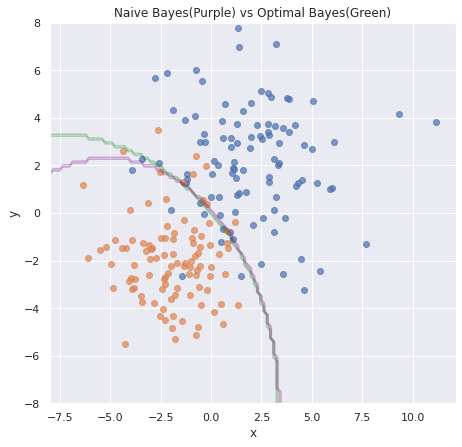

In [33]:
#%%%%%%%%%%%%%% Excercise: Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the decision boundary for the optimal and the naive Bayes classifiers goes here
"""

mu_list = [mu1,mu2]
sigma_list = [sigma1,sigma2]


fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)


zz = np.array(  [ predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

Z = zz.reshape(X.shape)

ax.contour( X, Y, Z, 1, alpha = .3, colors = ('green'))

from sklearn.naive_bayes import GaussianNB

X_data = np.asarray(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
y_labels = np.hstack((np.zeros(100),np.ones(100)))

model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

Z = zz.reshape(X.shape)

ax.contour( X, Y, Z, 1, alpha = .3, colors = ('purple'))



ax.scatter(x1, y1, alpha = .7)
ax.scatter(x2, y2, alpha = .7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Naive Bayes(Purple) vs Optimal Bayes(Green)')



plt.show()



#### Excercise: B) Accuracies

In [ ]:
#%%%%%%%%%%%%%% EXCERCISE - Write the code below %%%%%%%%%%%%%%%%%%%%%%%%%%%
"""
Code for comparing the accuracies of the optimal and the naive Bayes classifiers goes here
"""
y_pred = np.array(  [predict_Bayes_class(np.array([xx,yy]),mu_list,sigma_list) 
                     for xx, yy in zip(np.ravel(X_data[:,0]), np.ravel(X_data[:,1])) ] )
display(np.mean(y_pred == y_labels))


display(model_sk.score(X_data,y_labels))